C:\Users\CHANGH~1\AppData\Local\Temp/ipykernel_14008/365803077.py:34: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype=int)/int(row[2])


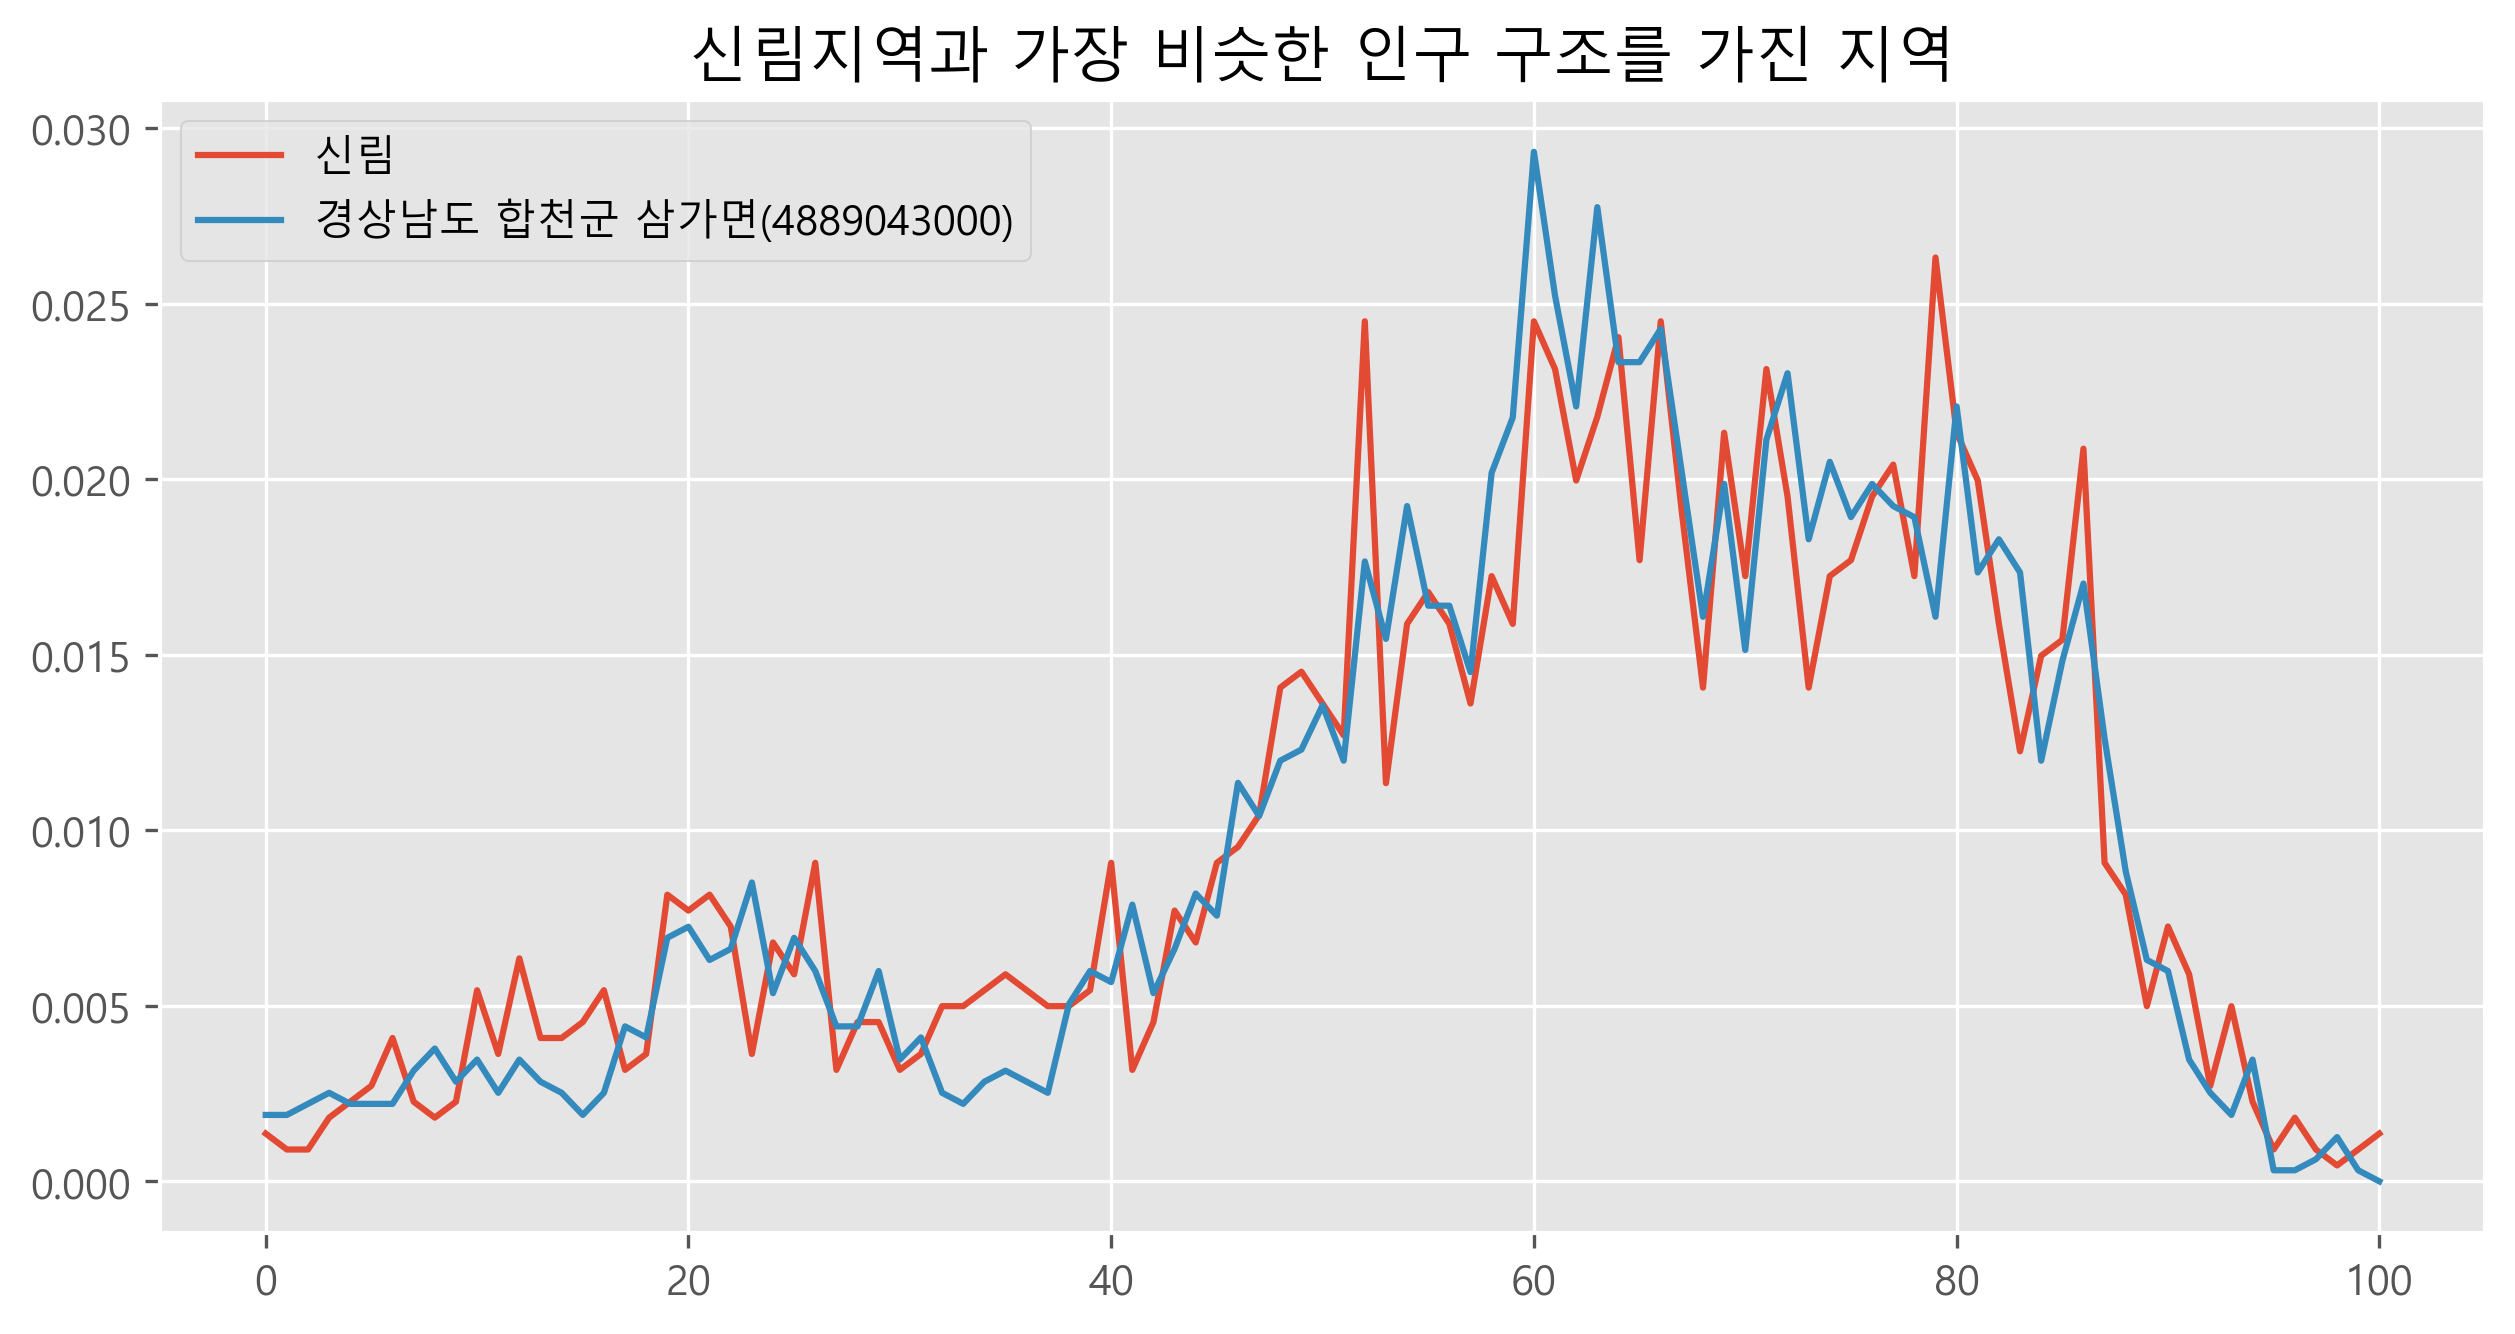

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

##### font 깨짐 방지
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')
#####

f = open('data/age.csv')
data = csv.reader(f)
next(data)
data = list(data)

name = input('where?')
mn = 1
result_name = ''
result = 0

for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)/int(row[2])

for row in data:
    away = np.array(row[3:], dtype=int)/int(row[2])
    s = np.sum((home - away)**2)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result = away

# 시각화
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.title(name + '지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()

# 최근 9년간 청년 인구 분석

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# 2012~2020년도 청년 인구 분석 (최근 9년간 추이 분석)
# 청년 기준 : 20 ~ 34세

data_9 = []
index = []
columns = [x for x in range(20, 31)]

for i in range(9):
    with open(f'data/20{i+12}12_20{i+12}12_연령별인구현황_연간.csv') as f:
        data = csv.reader(f)
        next(data)
        # next(data) # 전국 인구수 제외
        for row in data: # 17개의 행정구역
            data_9.append(row[23:34]) # 청년 인구수 추출
            index.append(row[0])
            
df = pd.DataFrame(data_9, index=index, columns=columns)
df = df.astype(float)
df.head()

,20,21,22,23,24,25,26,27,28,29,30
전국 (0000000000),724591.0,701604.0,638824.0,629880.0,624641.0,616444.0,626913.0,652491.0,662132.0,749428.0,824093.0
서울특별시 (1100000000),139523.0,139129.0,130993.0,133871.0,140471.0,142752.0,150889.0,161430.0,164531.0,185355.0,198489.0
부산광역시 (2600000000),50802.0,49761.0,45461.0,46663.0,45106.0,44242.0,43852.0,44732.0,45583.0,50572.0,55133.0
대구광역시 (2700000000),38188.0,36919.0,33382.0,33246.0,30999.0,30125.0,29809.0,29864.0,29558.0,33883.0,37118.0
인천광역시 (2800000000),43411.0,42457.0,38690.0,37654.0,36987.0,35982.0,36270.0,37759.0,37827.0,43141.0,47210.0


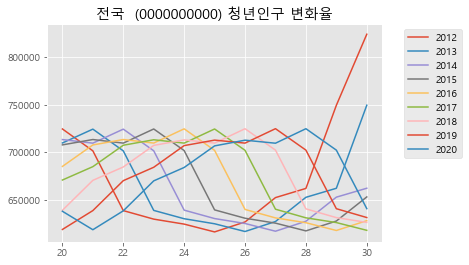

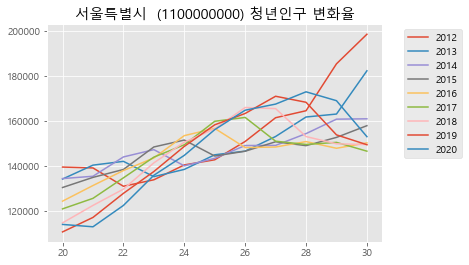

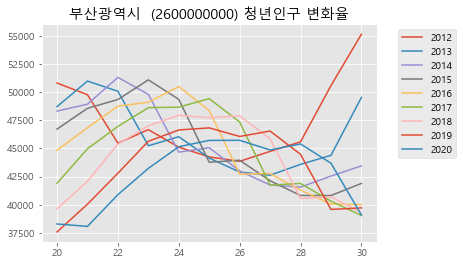

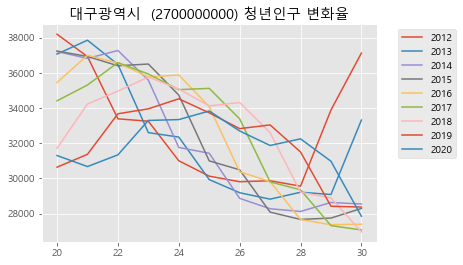

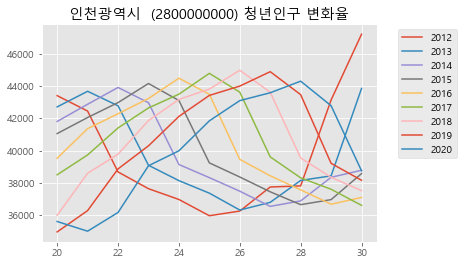

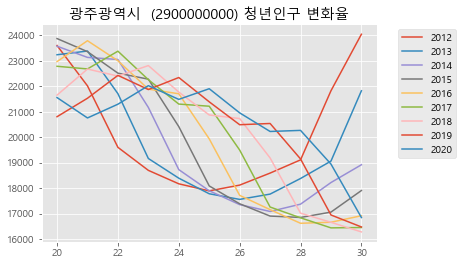

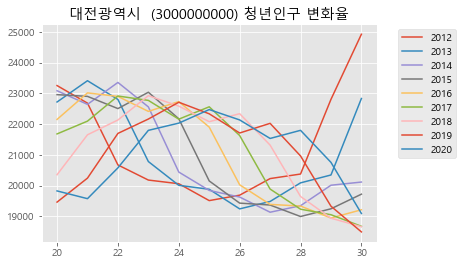

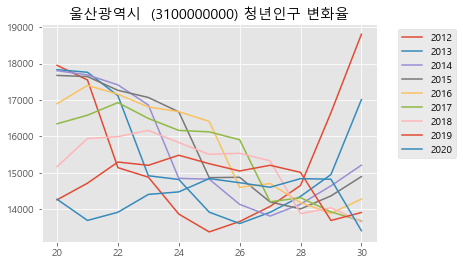

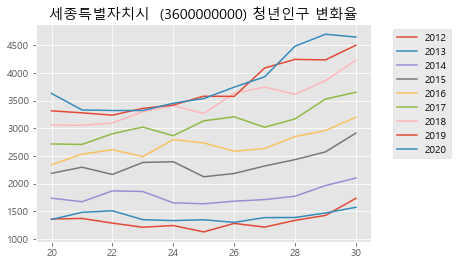

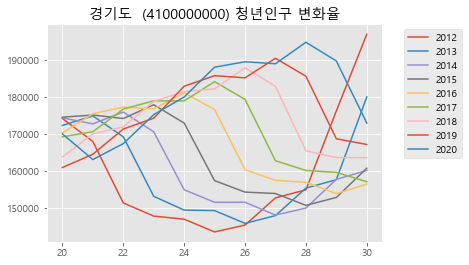

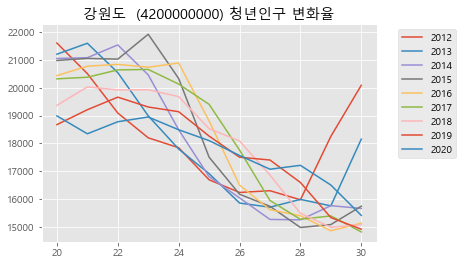

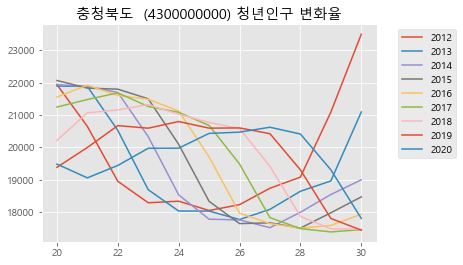

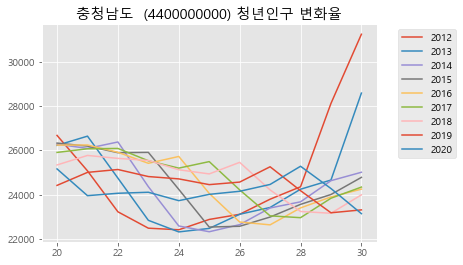

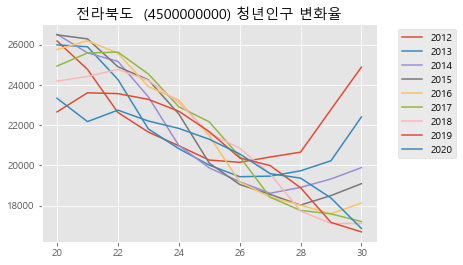

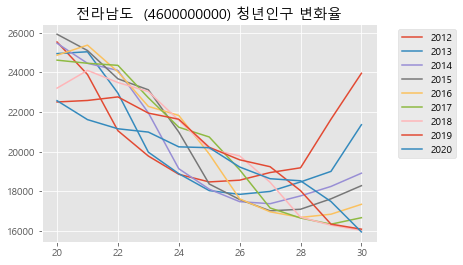

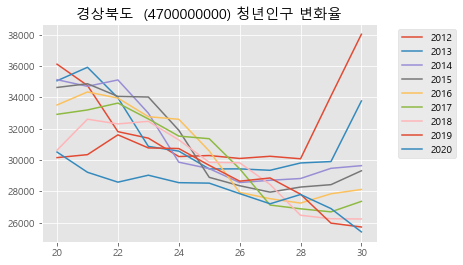

In [3]:
for j in range(16):
    for i in range(9):
        plt.style.use('ggplot')
        plt.plot(df.iloc[j + i*18], label=f'{i+2012}')
    plt.title(f'{index[j]} 청년인구 변화율')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

# 서울 최근 5년간 가장 많이 증가한 구

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# 2016~2020년도 서울 구별 인수 증가율 분석
data_5 = []
index = []

for i in range(5):
    with open(f'data/20{i+16}12_20{i+16}12_주민등록인구및세대현황_연간.csv') as f:
        data = csv.reader(f)
        next(data)
        next(data) # 서울 총 인구수 제외
        for row in data: # 25개의 구
            data_5.append(int(row[1].replace(',', ''))) # 구별 인구수 추출
            index.append(row[0])
            
df = pd.DataFrame(data_5, index=index)
# df.head()

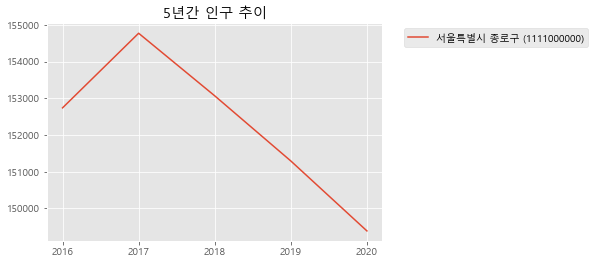

In [5]:
# for j in range(5):
x = ['2016', '2017', '2018', '2019', '2020']
y = [df.iloc[i*(25)] for i in range(5)]

plt.style.use('ggplot')
plt.plot(x, y, label=f'{index[0]}')
plt.title('5년간 인구 추이')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


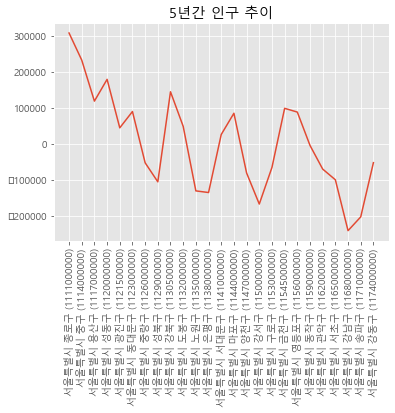

In [6]:
z = [df.iloc[5*i -1] - df.iloc[i] for i in range(25)]
x = index[:25]

plt.style.use('ggplot')
plt.plot(x, z)
plt.title('5년간 인구 추이')
plt.xticks(x, rotation=90)
plt.show()